# Uitwerkingen Bas Levering

# Python versus Numpy

### Stijn Oomes

donderdag 9 september 2021

---
 
**Python Data Science Handbook**

Chapter 2. Introduction to NumPy

https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch02.html#introduction-to-numpy

## Importeer libraries

Controleer welke version van Python in dit notebook wordt gerund.

In [16]:
from platform import python_version

print(python_version())

3.9.7


Importeer Numpy en OpenCV en controleer welke versie worden gerund.

In [17]:
import numpy as np
print(np.__version__)

1.19.5


In [18]:
import cv2 as cv # Je ziet dat ik efficient ben en liever niet elke keer de '2' achter 'cv' wil typen.
print(cv.__version__)

4.5.3


Ik check ook meteen even de versies van Scikit-Learn, TensorFlow, en Keras. Deze libraries gaan we volgende week gebruiken.

In [19]:
import sklearn as sk
print(sk.__version__)

0.24.2


In [20]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [21]:
import keras as ks
print(ks.__version__)

2.6.0


## Definieer een parameter

Definieer een parameter n en geef het voorlopig even een relatief kleine waarde, bijvoorbeeld 4.

We beginnen de test met een datastructuur met weinig elementen. Daarna mag je die waarde zo groot maken als je computer aan kan.

In [22]:
num = 4

## Meet hoeveel geheugen wordt gebruikt

Hoe kunnen we zien hoeveel geheugen een datastructuur inneemt?

Definieer een lijst in Python met `n` elementen met een random waarde.

Hint: `import random`

In [23]:
from random import random

a_list = []
for i in range (num):
    f = random()
    a_list.append(f)

print(a_list)

[0.5869595004652224, 0.5892558212615776, 0.46247909188573233, 0.3573657836593158]



Kijk daarna hoeveel bytes deze lijst in het geheugen inneemt.

Hint: `import sys`

In [24]:
import sys
sys.getsizeof(a_list)

88

Kijk ook hoeveel één element van deze lijst in het geheugen inneemt.

In [25]:
sys.getsizeof(a_list[0])


24

Experimenteer eens met de grootte van andere datatypes. 

Hoeveel geheugen neemt een Boolean in? Verbaast je dat?

In [26]:
p = True
sys.getsizeof(p)

28

In [27]:
p = False
sys.getsizeof(p)

24

## Meet hoe lang een berekening duurt

Hoe lang duurt het om bijvoorbeeld alle getallen in onze lijst op te tellen?

In [28]:
sum(a_list)

1.9960601972718481

Meet de starttijd, voer de sommatie uit, meet de eindtijd. Bepaal het verschil tusen eindtijd en begintijd. 

In welke eenheid wordt de tijd gemeten?


Hint: `import time`

In [29]:
import time

start = time.time() # Start the timing
sum(a_list)
end = time.time() # Stop the timing

print(end-start)

0.00017642974853515625


## Python list

Maak twee Python lists van lengte n. Vermenigvuldig die twee lists elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de Python list in neemt.

Meet ook hoe lang deze berekeningen duren. Let op je parameter n is nu nog klein.

In [30]:
%%timeit 
a_list = [random() for i in range(0, num)]
sum(a_list)

936 ns ± 21.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## NumPy array

Maak twee NumPy arrays van lengte n. Vermenigvuldig de twee arrays elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de NumPy array in neemt.

Meet hoe lang deze berekeningen duren. Let op je parameter n is nu nog klein.

In [31]:
%%timeit 
array = np.random.randint(255,size=num)
array.sum()

21.8 µs ± 211 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Vergelijking Python list versus NumPy array

Kijk nu voor verschillende waardes van de parameter n hoe lang de berekeningen duren.

Bereken voor elke n de tijd voor de Python berekening gedeeld door de NumPy bereking.

Kies als verschillende n waardes bijvoorbeeld 4, 8, 16, 32, 64, 128, 256, 1024.

Een grafiek zou hier heel handig zijn!

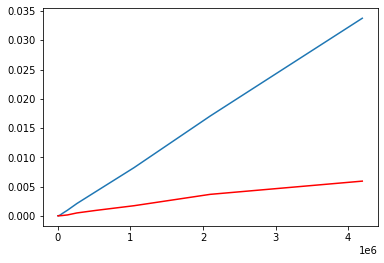

In [32]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer
num = 4
timings_python_list = {}
timings_numpy_array = {}

while num <= 1_048_576*4:
    python_list = [random() for i in range(0, num)]
    numpy_array = np.random.randint(255, size=num)

    start = timer()  # Time python list sum.
    sum(python_list)
    end = timer()
    timings_python_list[num] = (end-start)

    start = timer()  # Time numpy array sum.
    numpy_array.sum()
    end = timer()
    timings_numpy_array[num] = (end-start)

    num *= 2

plt.plot(timings_python_list.keys(), timings_python_list.values())
plt.plot(timings_numpy_array.keys(), timings_numpy_array.values(),'r')


## Reflectie
Je kunt zien dat Numpy arrays minder ruimte in beslag nemen dan python lists, ook heb je veel relevante
ingebouwde functies.
